In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('height-weight.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  23 non-null     int64
 1   Height  23 non-null     int64
dtypes: int64(2)
memory usage: 500.0 bytes


In [6]:
df.head(2)

,Weight,Height
0,45,120
1,58,135


Text(0, 0.5, 'Height')

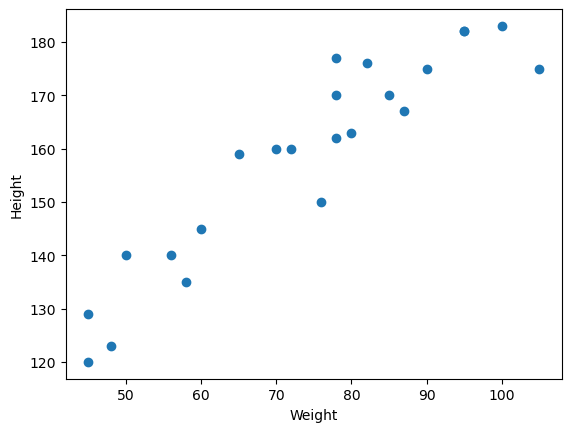

In [9]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

In [10]:
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


C:\Users\Sahil Patil Pc\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


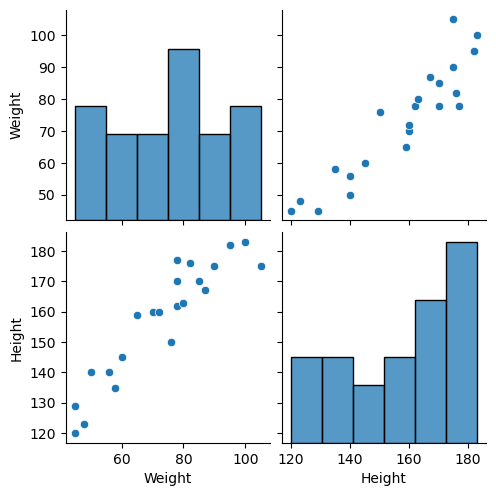

In [11]:
import seaborn as sns
sns.pairplot(df)

In [12]:
## splitting dependent and independent
X = df[['Weight']]  # independent feature should be a DataFrame or 2D Array[[]]
y = df['Height']  # can be in series or 1D array

In [13]:
# Train test split
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [17]:
X_train.shape

(17, 1)

In [19]:
X_test.shape

(6, 1)

In [20]:
## Standardization

from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [24]:
X_test = scaler.transform(X_test)

In [26]:
## Apply Simple linear regression

from sklearn.linear_model import LinearRegression

In [30]:
regression = LinearRegression(n_jobs=-1)

In [31]:
regression.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [32]:
regression.coef_

array([17.2982057])

In [34]:
regression.intercept_

156.47058823529412

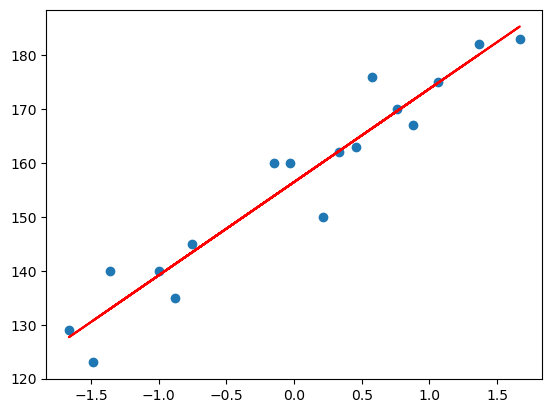

In [37]:
# plot best fit line

plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train), color='r')

In [40]:
## prediction for test data
y_pred = regression.predict(X_test)

In [41]:
## performance matrix

from sklearn.metrics import mean_absolute_error, mean_squared_error

In [47]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('mse:',mse)
print('mae:',mae)
print('rmse:',rmse)

mse: 114.84069295228699
mae: 9.66512588679501
rmse: 10.716374991212605


In [50]:
# R2 square

from sklearn.metrics import r2_score

In [51]:
score = r2_score(y_test, y_pred)
score

0.7360826717981276

In [53]:
# Adjusted r2

1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6701033397476595

In [54]:
# OLS Linear Regression

import statsmodels.api as sm

In [55]:
model = sm.OLS(y_train, X_train).fit()

In [56]:
pred = model.predict(X_test)
pred

array([  5.79440897,   5.79440897, -28.78711691,  23.60913442,
        -7.82861638,  34.08838469])

In [57]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Mon, 27 Oct 2025   Prob (F-statistic):                       0.664
Time:                        14:43:08   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\Sahil Patil Pc\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [60]:
## Prediction for new data
regression.predict(scaler.transform([[72]]))

C:\Users\Sahil Patil Pc\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.97744705])